In [462]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [463]:
def rbf(data_point, center, var):
    return np.exp(-1.0/(2*var)*(data_point - center)**2)

In [464]:
x = np.linspace(0.001, 2*np.pi + 0.001, 100)[:,np.newaxis]

In [465]:
y = np.sin(2*x)

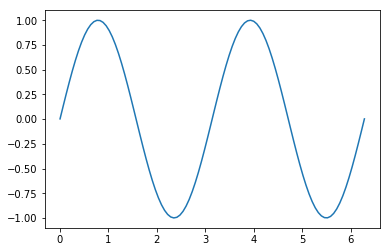

In [466]:
plt.plot(x,y)

In [467]:
random_idx = np.random.permutation(len(x))

In [468]:
# play with this one
nCenters = 20

In [469]:
centers = [x[random_idx[i]] for i in range(nCenters)]

In [470]:
var = 0.4

In [471]:
Phi = np.asarray([rbf(x,center, var) for center in centers]).squeeze()

In [472]:
weights = np.linalg.pinv(Phi).T.dot(y)

In [473]:
predictions = weights.T.dot(Phi).T

In [474]:
error =  y - (Phi.T.dot(weights) + bias*np.ones((Phi.shape[1],1))) 
delta_weight = Phi.dot(error)
delta_bias = error.sum()
weights += eta*delta_weight
bias += eta*delta_bias

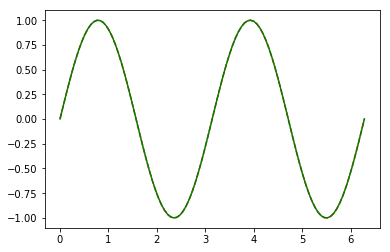

In [475]:
plt.plot(x,predictions, 'r--')
plt.plot(x,y, 'g-')

In [535]:
weights = np.random.normal(0,1, nCenters)[:,np.newaxis]
bias = np.random.normal(0,1, 1)[:,np.newaxis]

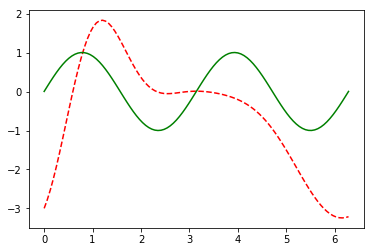

In [536]:
predictions = Phi.T.dot(weights) + bias*np.ones((Phi.shape[1],1))
plt.plot(x,predictions, 'r--')
plt.plot(x,y, 'g-')

In [537]:
#avg_res_error
np.mean((y - (Phi.T.dot(weights) + bias*np.ones((Phi.shape[1],1))))**2)

2.0593617068637191

In [538]:
eta = 0.05
epochs = 100

In [539]:
res_errors = []
for _ in range(epochs):
    for i in range(len(x)):
        error =  y[i] - (Phi[:,i].T.dot(weights) + bias)
        delta_weight = Phi[:,i].dot(error.squeeze())[:,np.newaxis]
        delta_bias = error.sum()
        weights += eta*delta_weight
        bias += eta*delta_bias
    
    avg_res_error = np.mean((y - (Phi.T.dot(weights) + bias*np.ones((Phi.shape[1],1))))**2)
    res_errors.append(avg_res_error)

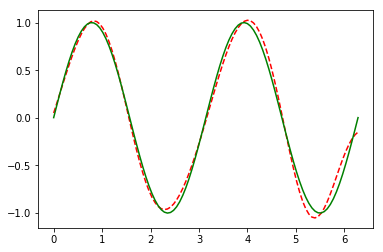

In [540]:
predictions = Phi.T.dot(weights) + bias*np.ones((Phi.shape[1],1))
plt.plot(x,predictions, 'r--')
plt.plot(x,y, 'g-')

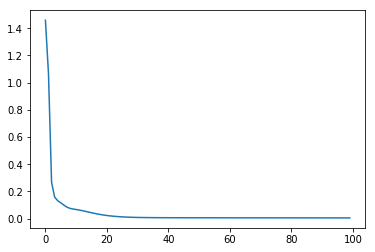

In [541]:
plt.plot(res_errors)

In [542]:
np.mean((y - (Phi.T.dot(weights) + bias*np.ones((Phi.shape[1],1))))**2)

0.0047521064716549823